<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

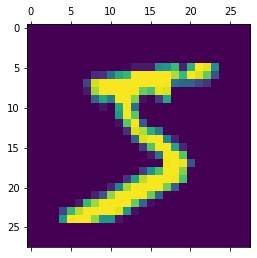

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4889 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3061 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2857 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2745 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.2678 - accuracy: 0.9265


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 735us/step - loss: 0.2684 - accuracy: 0.9244


[0.2683548927307129, 0.9243999719619751]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.7482878e-05, 1.3930132e-10, 3.9931445e-05, 9.2790723e-03,
       9.4204961e-07, 7.0370457e-05, 7.4672968e-10, 7.9613578e-01,
       6.4372158e-05, 1.0907352e-03], dtype=float32)

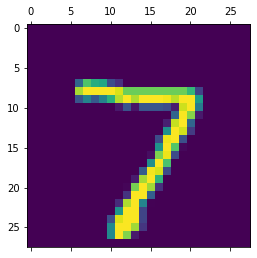

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    3,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    8,  925,   15,    7,    1,   13,   11,   37,    6],
       [   4,    0,   19,  935,    0,   11,    2,   13,   17,    9],
       [   2,    1,    4,    1,  907,    0,    8,    4,   10,   45],
       [  11,    3,    3,   46,   11,  748,   16,   10,   37,    7],
       [  14,    3,    8,    1,    7,    9,  911,    2,    3,    0],
       [   1,    6,   21,    8,    5,    0,    0,  949,    1,   37],
       [   8,    7,    7,   29,    9,   18,    8,   12,  864,   12],
       [  11,    7,    1,   12,   17,    4,    0,   24,    4,  929]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

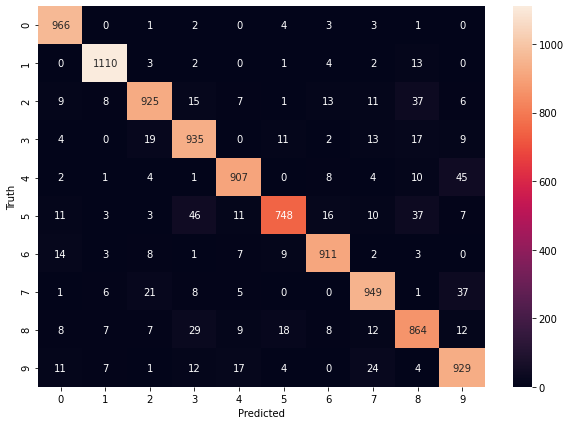

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.9168
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1415 - accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1013 - accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0636 - accuracy: 0.9806


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9703


[0.09724420309066772, 0.970300018787384]

Text(69.0, 0.5, 'Truth')

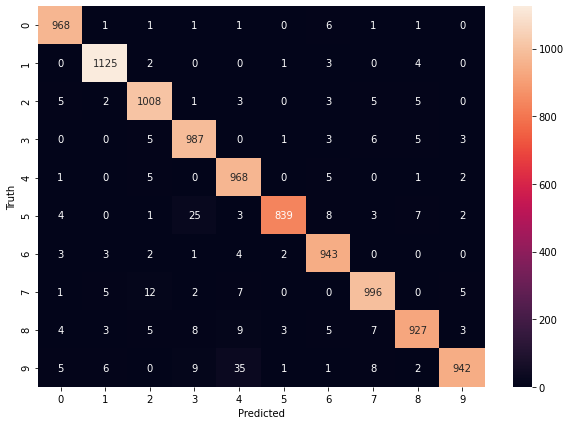

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - accuracy: 0.9620
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0941 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0388 - accuracy: 0.9880
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0265 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.023

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9764


[0.07833191007375717, 0.9764000177383423]